In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\SalaryData_Test(1).csv")

In [3]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [5]:
x = data.drop(['Salary'] , axis = 1)
y = data['Salary']

In [6]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [7]:
label_encoder = LabelEncoder()

x_encoded = x.apply(label_encoder.fit_transform)

In [8]:
x_encoded

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,8,2,1,6,4,6,3,2,1,0,0,39,37
1,21,2,11,8,2,4,0,4,1,0,0,49,37
2,11,1,7,11,2,10,0,4,1,0,0,39,37
3,27,2,15,9,2,6,0,2,1,87,0,39,37
4,17,2,0,5,4,7,1,4,1,0,0,29,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37
15056,22,2,9,12,0,9,1,4,0,0,0,35,37
15057,21,2,9,12,2,9,0,4,1,0,0,49,37
15058,27,2,9,12,0,0,3,1,1,73,0,39,37


In [9]:
x_train , x_test , y_train , y_test = train_test_split(x_encoded , y , test_size = 0.20 , random_state = 42)

In [10]:
x_train.shape , x_test.shape

((12048, 13), (3012, 13))

In [11]:
clf = SVC()

In [12]:
clf.fit(x_train , y_train)

SVC()

In [13]:
## to make prediction on the test datasets

In [14]:
y_pred = clf.predict(x_test)

In [15]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [18]:
import seaborn as sn

<Axes: ylabel='Count'>

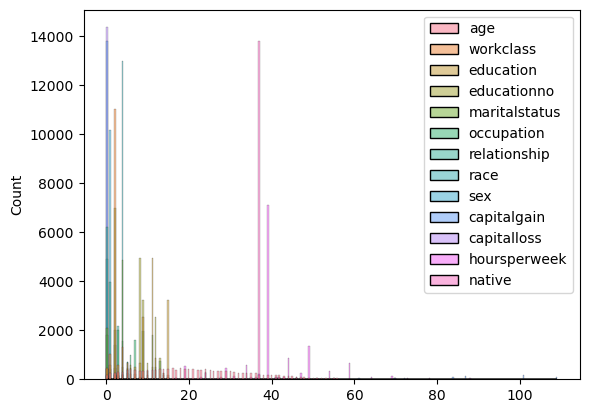

In [20]:
sn.histplot(x_encoded)

In [16]:
## performance metrics

In [17]:
accuracy = accuracy_score(y_pred , y_test)

In [21]:
accuracy

0.8024568393094289

C:\Users\user\AppData\Local\Temp\ipykernel_3760\738640774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x_encoded)


<Axes: ylabel='Density'>

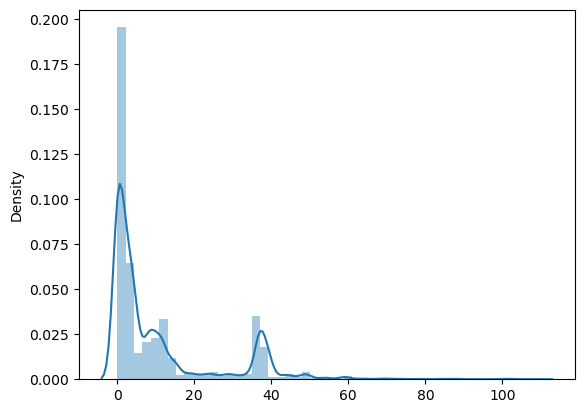

In [26]:
sn.distplot(x_encoded)

In [22]:
confusion_rp = confusion_matrix(y_pred , y_test)

In [23]:
confusion_rp

array([[2215,  564],
       [  31,  202]], dtype=int64)

In [24]:
classification_rp = classification_report(y_test , y_pred)

In [25]:
classification_rp

'              precision    recall  f1-score   support\n\n       <=50K       0.80      0.99      0.88      2246\n        >50K       0.87      0.26      0.40       766\n\n    accuracy                           0.80      3012\n   macro avg       0.83      0.62      0.64      3012\nweighted avg       0.81      0.80      0.76      3012\n'

In [26]:
print(classification_rp)

              precision    recall  f1-score   support

       <=50K       0.80      0.99      0.88      2246
        >50K       0.87      0.26      0.40       766

    accuracy                           0.80      3012
   macro avg       0.83      0.62      0.64      3012
weighted avg       0.81      0.80      0.76      3012



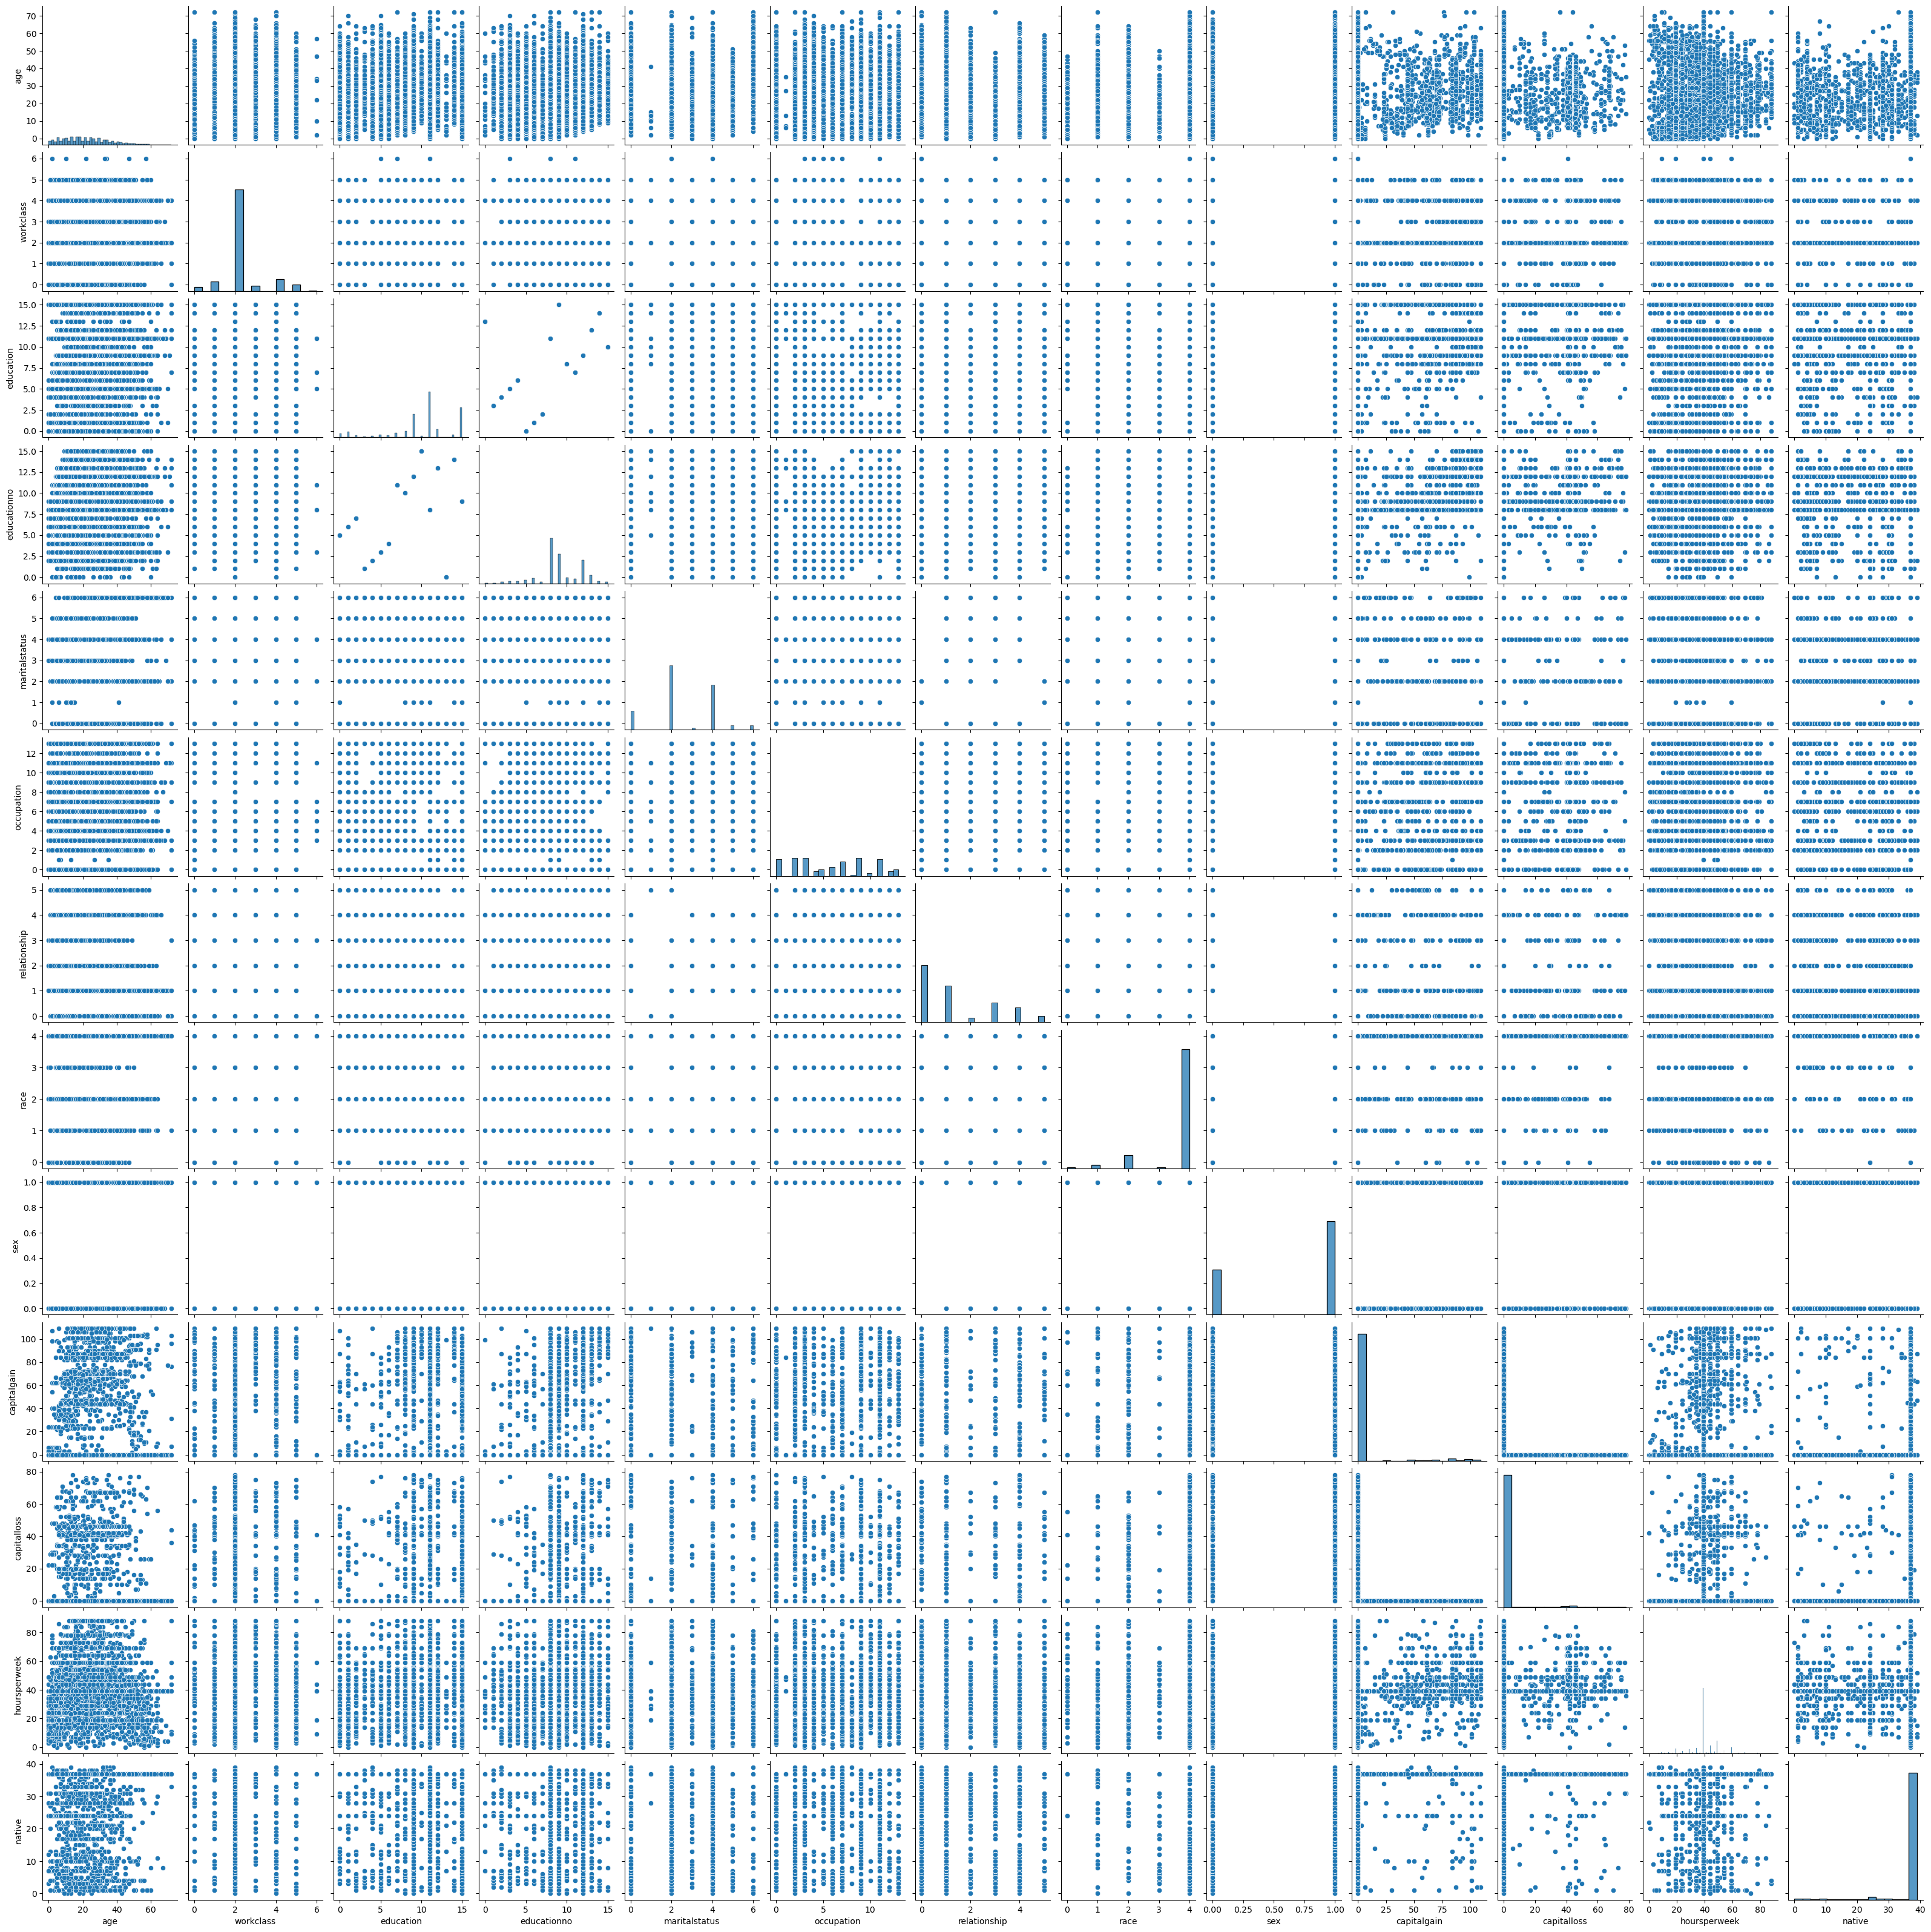

In [24]:
sn.pairplot(x_encoded)

